# __Google Analytics Admin API: Field Manual__

## __A. Setting Up a Virtual Environment__

- If you want to setup your Virtual Environment (recommended), the following instructions will be helpful.
- Otherwise you can skip this section (section is hidden below).

### 1. Install Virtual Environment Python Package
- On Windows: Go to your Command Prompt and type "python -m pip install --user virtualenv" to install the virtualenv package
- 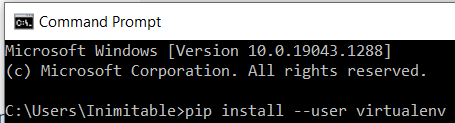
- After installation, you can access help via Commpand Prompt with "python -m virtualenv --help"
- 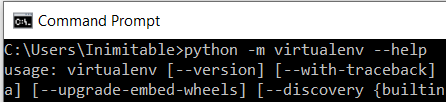
- More here: https://virtualenv.pypa.io/en/latest/index.html

### 2. Creating a Virtual Environment
- Within your Command Prompt, change to your working directory
- 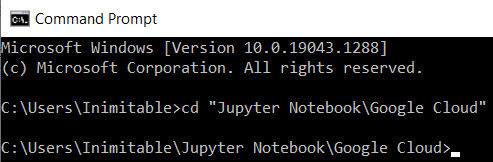
- Create your virtual environment folder, I will call mine "gcloud-venv"
- 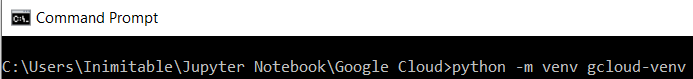
- Once that's done, you will see that folder created in your working directory
- 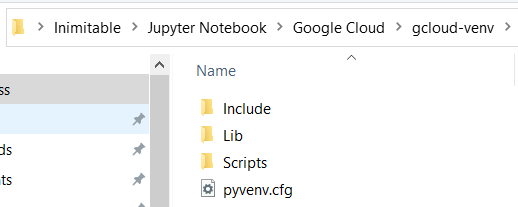
- Activate your virtual environment by navigating to "{your virtual environment folder created above}\Scripts\activate". If you see (virtual-env) prefix in front of your working directory, you're done!
- 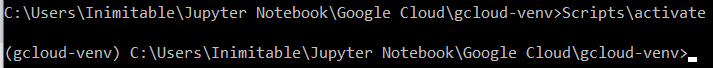

### 3. Install ipykernel in your Virtual Environment
- Ensure you're in your Virtual Environment, you will see your Virtual Environment name in parenthesis in front of your working directory and run "pip install ipykernel"
- 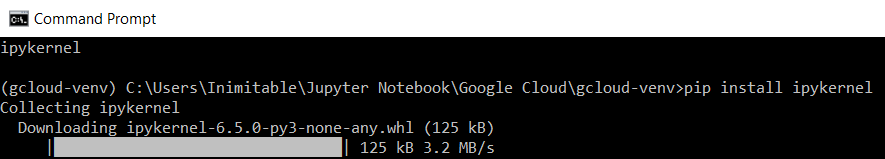
- Before you run Jupyterlab, introduce your virtual environment to Jupyterlab: "python -m ipykernel install --user --name={your virtual environment name}"
- In my case, it is "python -m ipykernel install --user --name=gcloud-venv"
- 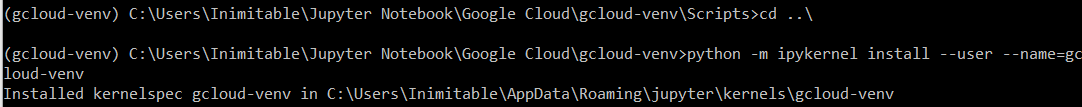
- Now on Jupyterlab, you can see and select your kernel - you're now ready to go!
- 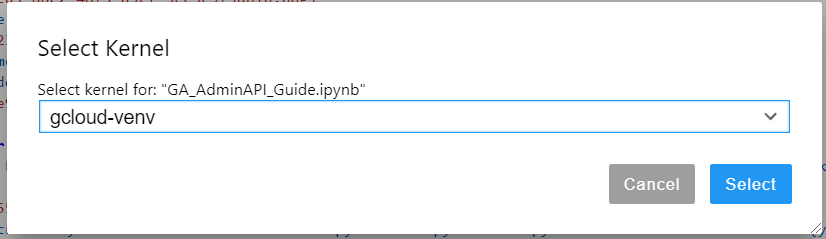

### 4. Deactivating your Virtual Environment
- Simply type "deactivate"
- To activate it again, simply navigate back to your Virtual Environment\Scripts folder and type "activate"
- 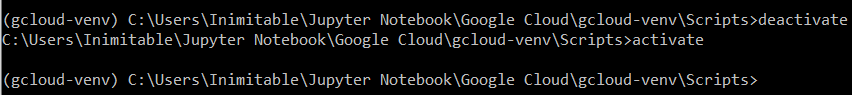

### 5. Other Useful Command Prompt Commands
- cd: Change directory
- cd ..\: Go up 1 level in your directory
- cls: Clear the console
- pip list: See the list of Python packages installed in your environment
- !{command}:  You can run Command Prompt commands within your notebook cell by prepending "!" before the command "!pip list"
- jupyter kernelspec list: See list of all installed kernels
- jupyter kernelspec uninstall virtualenv: To remove kernel from Jupyterlab

## __B. Setting up your Google Analytics Admin API Client Library__

### 6. Install the Google Analytics Admin API Client Library
- Within your Virtual Environment Working Directory: "pip install google-analytics-admin"
- 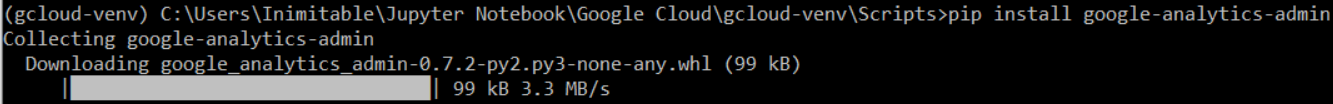
- Double check it's installed with "pip list"
- 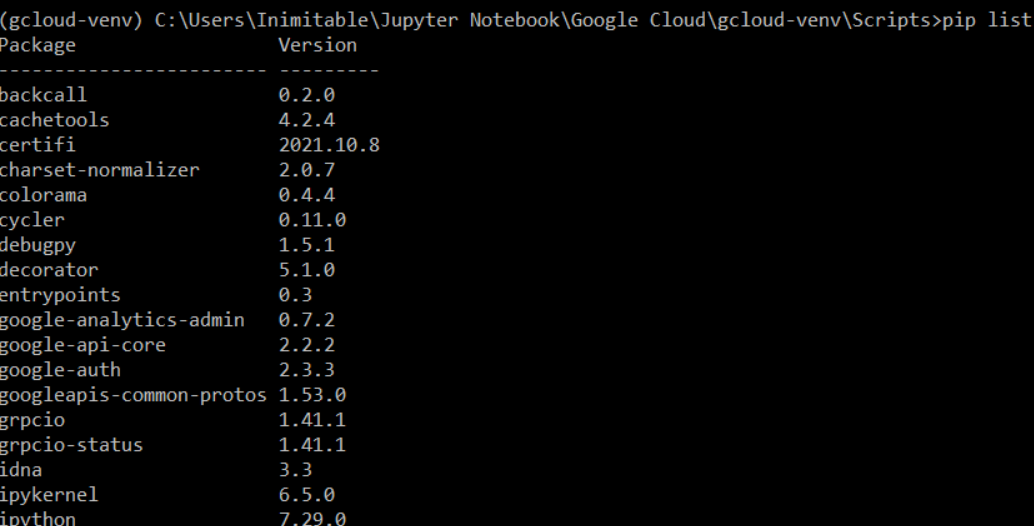
- More here: https://developers.google.com/analytics/devguides/config/admin/v1/quickstart-client-libraries?authuser=1#step_3_install_the_client_library

### 7. Set your Environmental Variables on your OS
- Take note of the full file path of your Service Account JSON Key: "C:\\Users\\Inimitable\\Desktop\\hazel-thunder-331208-3c2d47820ff1.json"
- 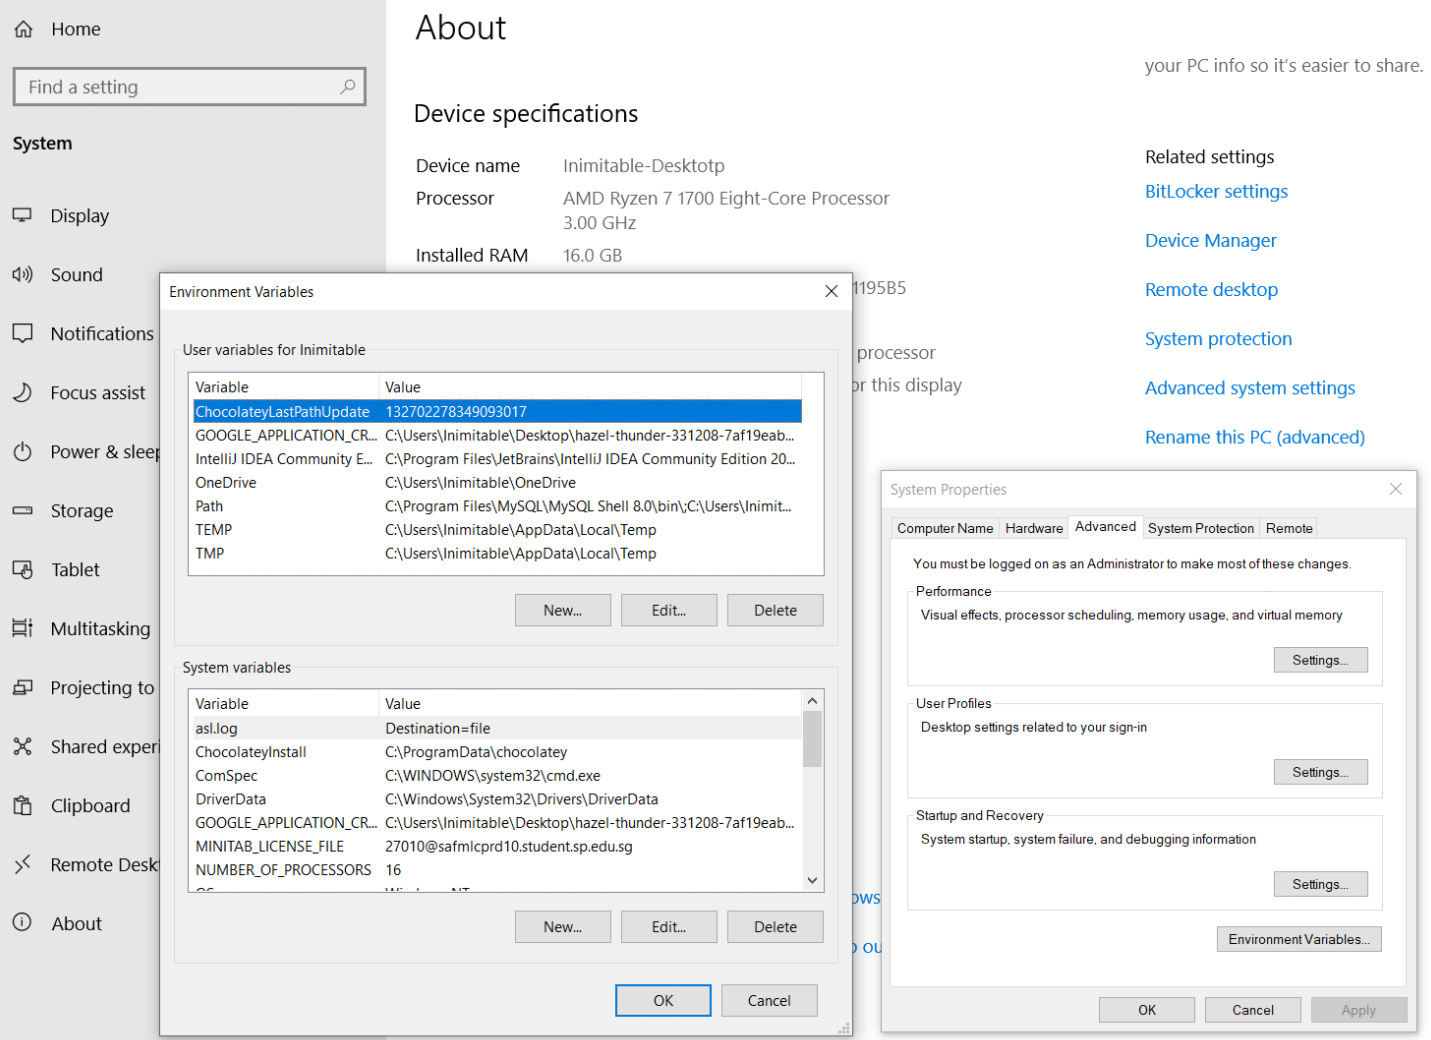

### 8. Grant Google Analytics Access to your Service Account Created Earlier
- Grant the correct level of access
- 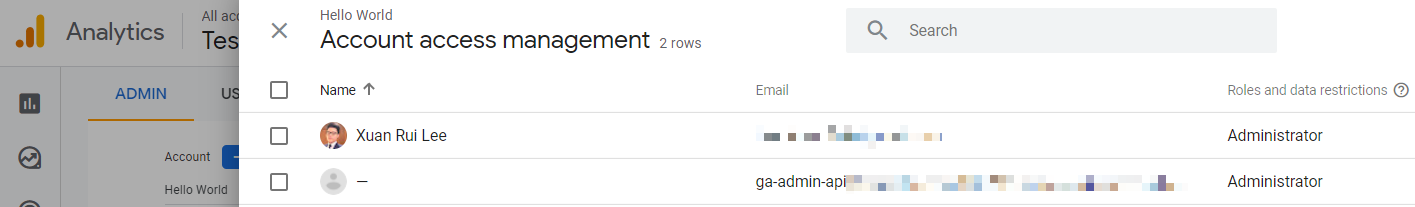
- Now you're ready to go!

## __C. Run the Google Analytics Admin API__

### Useful Links to Documentation:
- Google Analytics Admin API Official Doc: https://developers.google.com/analytics/devguides/config/admin/v1?authuser=1
- Google Analytics Admin API Python Client Library: https://github.com/googleapis/python-analytics-admin#installation
- Google Analytics Admin API Python Client Library Samples: https://github.com/googleapis/python-analytics-admin/tree/main/samples
- Google Analytics Admin API Methods: https://googleapis.dev/python/analyticsadmin/latest/admin_v1alpha/analytics_admin_service.html

## __D. (Optional) Google Sheets with Python__

### Steps:
1. Within your Google Cloud Project, enable these 2 APIs: I. Google Sheets API, II. Google Drive API
2. Grant access of your Google Sheets to your Service Account
3. 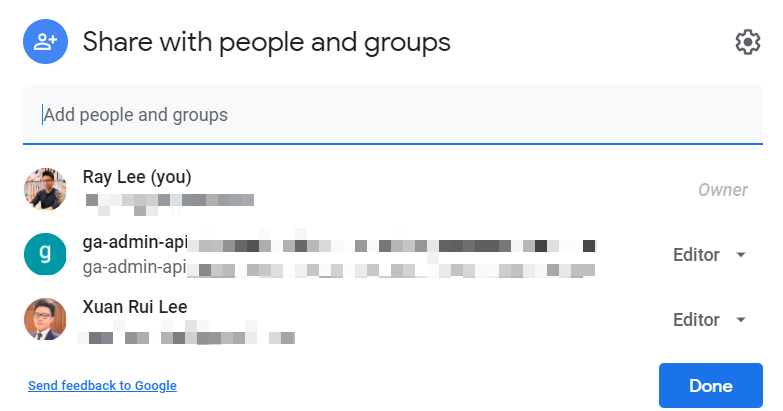
4. Install the Google Sheet Python Client Libraries: "pip install gspread" and "pip install --upgrade google-api-python-client oauth2client"

### __1. Pulling Data from Google Sheet (Optional)__

- Link to Google Sheet: https://docs.google.com/spreadsheets/d/1IEOWi_-iNq4gOju0u0utyuYRPHcOmVX6SowqCjKsldM/edit#gid=0

In [1]:
# Importing the Python libraries for Google Sheets
import gspread
from oauth2client.service_account import ServiceAccountCredentials
# import numpy as np
import pandas as pd
# import matplotlib.pyplot as plt

In [2]:
# Define scope of application and add the JSON file with the credentials of your Service Account
scope = ['https://spreadsheets.google.com/feeds','https://www.googleapis.com/auth/drive']

# Add credentials to the account
creds = ServiceAccountCredentials.from_json_keyfile_name('C:\\Users\\Inimitable\\Desktop\\hazel-thunder-331208-3c2d47820ff1.json', scope)

# Authorize the clientsheet 
client = gspread.authorize(creds)

In [25]:
# Get instance of the Google Sheet
sheet = client.open('Masters of Mobile | GA4 Admin API - Test') # Pass title of the Google Sheet here

# Get first worksheet of the Google Sheet
sheet_instance = sheet.get_worksheet(0)

In [26]:
# Get value of specific cell
sheet_instance.cell(row=1,col=1)

<Cell R1C1 'GA Account ID'>

In [27]:
# Get all records of the data
records_data = sheet_instance.get_all_records()

# View the data
records_data

[{'GA Account ID': 205115399,
  'GA Property ID': '',
  'Measurement ID': '',
  'Property Settings: Property Name': 'Test Property 1',
  'Property Settings: Industry Category': 'GAMES',
  'Property Settings: Reporting Time Zone': 'America/Los_Angeles',
  'Property Settings: Currency': 'USD',
  'Web Data Stream: URI': 'www.test_1.com',
  'Web Data Stream: Name': 'Web Data Stream - Test 1'},
 {'GA Account ID': 205115399,
  'GA Property ID': '',
  'Measurement ID': '',
  'Property Settings: Property Name': 'Test Property 2',
  'Property Settings: Industry Category': 'ARTS_AND_ENTERTAINMENT',
  'Property Settings: Reporting Time Zone': 'Asia/Singapore',
  'Property Settings: Currency': 'SGD',
  'Web Data Stream: URI': 'www.test_2.com',
  'Web Data Stream: Name': 'Web Data Stream - Test 2'},
 {'GA Account ID': 205115399,
  'GA Property ID': '',
  'Measurement ID': '',
  'Property Settings: Property Name': 'Test Property 3',
  'Property Settings: Industry Category': 'OTHER',
  'Property Sett

In [28]:
# Convert Dictionary to DataFrame
df = pd.DataFrame.from_dict(records_data)

# Preview the records
df.head(3)

,GA Account ID,GA Property ID,Measurement ID,Property Settings: Property Name,Property Settings: Industry Category,Property Settings: Reporting Time Zone,Property Settings: Currency,Web Data Stream: URI,Web Data Stream: Name
0,205115399,,,Test Property 1,GAMES,America/Los_Angeles,USD,www.test_1.com,Web Data Stream - Test 1
1,205115399,,,Test Property 2,ARTS_AND_ENTERTAINMENT,Asia/Singapore,SGD,www.test_2.com,Web Data Stream - Test 2
2,205115399,,,Test Property 3,OTHER,Europe/London,GBP,www.test_3com,Web Data Stream - Test 3


### __2. Create New GA4 Properties__

In [7]:
# Sets the GOOGLE_APPLICATION_CREDENTIALS to your Environment Variables (notice the double backslash to escape the special character ('\'))
import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"]="C:\\Users\\Inimitable\\Desktop\\hazel-thunder-331208-3c2d47820ff1.json"

- If you would like to find the list of GA Accounts you have access to:

In [8]:
# Find list of GA Accounts you have access to
def list_accounts():
    """Lists the available Google Analytics accounts."""
    from google.analytics.admin import AnalyticsAdminServiceClient

    # Using a default constructor instructs the client to use the credentials
    # specified in GOOGLE_APPLICATION_CREDENTIALS environment variable.
    client = AnalyticsAdminServiceClient()

    # Displays the configuration information for all Google Analytics accounts
    # available to the authenticated user.
#     for account in client.list_accounts():
#         print(account)
    return client.list_accounts()

In [9]:
accounts = list_accounts()

In [10]:
# Returns the google.analytics.admin_v1alpha.services.analytics_admin_service.pagers.ListAccountsPager Properties and Methods
# dir(accounts)

In [11]:
# Return the accounts you have access to
accounts._response

accounts {
  name: "accounts/205115399"
  create_time {
    seconds: 1629171862
    nanos: 610000000
  }
  update_time {
    seconds: 1629171862
    nanos: 610000000
  }
  display_name: "Hello World"
  region_code: "SG"
}

In [12]:
# Format the output
str(accounts._response)
import re
pat = re.compile(r'(accounts/(\d*))')
match = pat.findall(str(accounts._response))
for account in match:
    print(account[0] + ', ' + account[1])
account_ids = [account[1] for account in match]
print(account_ids)

accounts/205115399, 205115399
['205115399']


- Get the current list of GA4 Properties in your GA Account(s):

In [13]:
# Firstly, you might want to retrieve the list of GA Properties you have access to
from google.analytics.admin import AnalyticsAdminServiceClient
from google.analytics.admin_v1alpha.types import ListPropertiesRequest

def list_properties(account_id):
    """Lists Google Analytics 4 properties under the specified parent account
    that are available to the current user."""
    client = AnalyticsAdminServiceClient()
    results = client.list_properties(
        ListPropertiesRequest(filter=f"parent:accounts/{account_id}", show_deleted=True)
    )

#     print("Result:")
#     for property_ in results:
#         print(property_)
#         print()
    return results

In [14]:
list_properties_result = list_properties(account_ids[0]) # Get the list of Properties for my first GA Account

In [15]:
# List of existing Property IDs, which includes previously DELETED Properties in the Trash Can
import re
pat = re.compile(r'(properties/(\d*))')
match = pat.findall(str(list_properties_result._response))
for properties in match:
    print(properties[0] + ', ' + properties[1])
existing_properties_ids = [properties[1] for properties in match] # List of existing GA4 Property IDs
print(existing_properties_ids)

properties/283132656, 283132656
properties/293692734, 293692734
properties/294096577, 294096577
properties/294104260, 294104260
['283132656', '293692734', '294096577', '294104260']


- Create your new GA4 Properties based on data from the Google Sheet:
- Possible values for GA Property's Industry Category can be found here: https://developers.google.com/analytics/devguides/config/mgmt/v3/mgmtReference/management/webproperties

In [16]:
# Function to create GA4 Properties within a GA Account
from google.analytics.admin import AnalyticsAdminServiceClient
from google.analytics.admin_v1alpha.types import Property

def create_property(account_id, ga_property_name, ga_property_industryCat, ga_property_timezone, ga_property_currency):
    """Creates a Google Analytics 4 property."""
    client = AnalyticsAdminServiceClient()
    property_ = client.create_property(
        property=Property(
            parent=f"accounts/{account_id}",
            currency_code=ga_property_currency,
            display_name=ga_property_name,
            industry_category=ga_property_industryCat,
            time_zone=ga_property_timezone,
        )
    )

    print("Result:")
    print(property_)

In [17]:
# Loop through and create all the GA4 Properties
# This can be improved with error catching
for x in range(len(df)):
    ga_account_id = int(df['GA Account ID'][x])
    ga_property_name = df['Property Settings: Property Name'][x]
    ga_property_industryCat = df['Property Settings: Industry Category'][x]
    ga_property_timezone = df['Property Settings: Reporting Time Zone'][x]
    ga_property_currency = df['Property Settings: Currency'][x]
    create_property(ga_account_id, ga_property_name, ga_property_industryCat, ga_property_timezone, ga_property_currency)
    print(f'Created within GA Account: {ga_account_id} - GA Property: {ga_property_name}')

Result:
name: "properties/294117494"
parent: "accounts/205115399"
create_time {
  seconds: 1637213322
  nanos: 256000000
}
update_time {
  seconds: 1637213322
  nanos: 256000000
}
display_name: "Test Property 1"
industry_category: GAMES
time_zone: "America/Los_Angeles"
currency_code: "USD"
service_level: GOOGLE_ANALYTICS_STANDARD

Created within GA Account: 205115399 - GA Property: Test Property 1
Result:
name: "properties/294144368"
parent: "accounts/205115399"
create_time {
  seconds: 1637213323
  nanos: 577000000
}
update_time {
  seconds: 1637213323
  nanos: 577000000
}
display_name: "Test Property 2"
industry_category: ARTS_AND_ENTERTAINMENT
time_zone: "Asia/Singapore"
currency_code: "SGD"
service_level: GOOGLE_ANALYTICS_STANDARD

Created within GA Account: 205115399 - GA Property: Test Property 2
Result:
name: "properties/294098909"
parent: "accounts/205115399"
create_time {
  seconds: 1637213324
  nanos: 829000000
}
update_time {
  seconds: 1637213324
  nanos: 829000000
}
displa

### __3. Create New Web Data Stream for each New GA4 Property__

- Get list of Measurement IDs for your Newly Created Properties:

In [29]:
# Get new list of GA4 Property IDs that were just created
list_properties_result = list_properties(account_ids[0]) # Get the list of Properties for my first GA Account
import re
pat = re.compile(r'(properties/(\d*))')
match = pat.findall(str(list_properties_result._response))
for properties in match:
    print(properties[0] + ', ' + properties[1]) # Lists all GA4 Properties, old and new
new_properties_ids = [properties[1] for properties in match if properties[1] not in existing_properties_ids] # List of new GA4 Property IDs only
print(new_properties_ids)

properties/283132656, 283132656
properties/293692734, 293692734
properties/294096577, 294096577
properties/294117494, 294117494
properties/294104260, 294104260
properties/294098909, 294098909
properties/294144368, 294144368
['294117494', '294098909', '294144368']


- Create new Web Data Stream for each newly created GA4 Property:

In [31]:
# Function to create new Web Data Stream
from google.analytics.admin import AnalyticsAdminServiceClient
from google.analytics.admin_v1alpha.types import WebDataStream

def create_web_data_stream(property_id, ga_web_stream_uri, ga_web_stream_name):
    """Creates a web data stream for the Google Analytics 4 property."""
    client = AnalyticsAdminServiceClient()
    web_data_stream = client.create_web_data_stream(
        parent=f"properties/{property_id}",
        web_data_stream=WebDataStream(
            default_uri="https://www.google.com", display_name="Test web data stream"
        ),
    )

    print("Result:")
    print(web_data_stream)

In [32]:
# Create new Web Data Stream for each newly created GA4 Property
for x in range(len(new_properties_ids)):
    ga_property_id = new_properties_ids[x]
    ga_web_stream_uri = df['Web Data Stream: URI'][x]
    ga_web_stream_name = df['Web Data Stream: Name'][x]
    create_web_data_stream(ga_property_id, ga_web_stream_uri, ga_web_stream_name)

Result:
name: "properties/294117494/webDataStreams/3056672902"
measurement_id: "G-8Z0EB6P0VM"
create_time {
  seconds: 1637214151
  nanos: 124000000
}
update_time {
  seconds: 1637214151
  nanos: 124000000
}
default_uri: "https://www.google.com"
display_name: "Test web data stream"

Result:
name: "properties/294098909/webDataStreams/3056717060"
measurement_id: "G-1GSEQWBDQ7"
create_time {
  seconds: 1637214152
  nanos: 432000000
}
update_time {
  seconds: 1637214152
  nanos: 432000000
}
default_uri: "https://www.google.com"
display_name: "Test web data stream"

Result:
name: "properties/294144368/webDataStreams/3056724369"
measurement_id: "G-0FZ6LCCFL2"
create_time {
  seconds: 1637214153
  nanos: 704000000
}
update_time {
  seconds: 1637214153
  nanos: 704000000
}
default_uri: "https://www.google.com"
display_name: "Test web data stream"



### __4. Update Google Sheet with Newly Created Property IDs & Measurement IDs__

- Get list of Measurement IDs for your Newly Created Properties:

In [33]:
# Get list of Measurement IDs from your Data Streams
from google.analytics.admin import AnalyticsAdminServiceClient

def list_web_data_streams(property_id):
    """Lists web data streams for the Google Analytics 4 property."""
    client = AnalyticsAdminServiceClient()
    results = client.list_web_data_streams(parent=f"properties/{property_id}")

#     print("Result:")
#     for web_data_stream in results:
#         print(web_data_stream)
#         print()
    return results

In [35]:
# Updating the Google Sheet
for x in range(len(new_properties_ids)):
    property_id = new_properties_ids[x]
    web_data_streams_results = list_web_data_streams(property_id)
    pat = re.compile(r'(measurement_id:\s"(G-\w*)")')
    match = pat.findall(str(web_data_streams_results._response))
    new_measurement_ids = [measurement_id[1] for measurement_id in match]
    sheet_instance.update_cell(row=2+x,col=2, value=property_id) # Update Property IDs
    sheet_instance.update_cell(row=2+x,col=3, value=new_measurement_ids[0]) # Update Measurement IDs
    print(f'Updated Property ID: {property_id} and Measurement ID: {new_measurement_ids[0]}')

Updated Property ID: 294117494 and Measurement ID: G-8Z0EB6P0VM
Updated Property ID: 294098909 and Measurement ID: G-1GSEQWBDQ7
Updated Property ID: 294144368 and Measurement ID: G-0FZ6LCCFL2


### __5. Delete GA4 Properties__

In [18]:
# Function to delete GA4 Properties
from google.analytics.admin import AnalyticsAdminServiceClient

def delete_property(property_id):
    """Deletes the Google Analytics 4 property."""
    client = AnalyticsAdminServiceClient()
    client.delete_property(name=f"properties/{property_id}")
    print("Property deleted")

In [ ]:
# Delete the newly create GA4 Properties
for property_id in new_properties_ids:
    delete_property(property_id)

### The End.
### Thank You!